## ***Libraries***

In [ ]:
#Import useful libraries--------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import pandas as pd
'''
1.filtrar datos basura= (na, trash_data)
2.agupar por dia, mes y año= (year, dayofmounth ,mounth)
3.calcular la tardanza  por envios= (Actual_Shipment_Time, Planned_Shipment_Time)
4.grafica de eficiencia de envios por mes= (2.(Actual_Shipment_Time, Planned_Shipment_Time))
5.grafica de eficiencia de envios por mes, nombre y numero de trasportista= (2.(4.(Carrier_Name, Carrier_Num)))
6.grafica de eficiencia de envios por mes, origen y destino= (2.(4.(origen, destino)))

7.grafica de eficiencia de entrega por mes, nombre y numero de trasportista
8.grafica de eficiencia de entrega por mes, origen y destino

   '''

'\n1.filtrar datos basura= (na, trash_data)\n2.agupar por dia, mes y año= (year, dayofmounth ,mounth)\n3.calcular la tardanza  por envios= (Actual_Shipment_Time, Planned_Shipment_Time)\n4.grafica de eficiencia de envios por mes= (2.(Actual_Shipment_Time, Planned_Shipment_Time))\n5.grafica de eficiencia de envios por mes, nombre y numero de trasportista= (2.(4.(Carrier_Name, Carrier_Num)))\n6.grafica de eficiencia de envios por mes, origen y destino= (2.(4.(origen, destino)))\n\n7.grafica de eficiencia de entrega por mes, nombre y numero de trasportista\n8.grafica de eficiencia de entrega por mes, origen y destino\n\n   '

## ***Data Extraction***

In [ ]:
#Data extraction----------------------------------------------------------------


from google.colab import drive
drive.mount('/content/drive')

deliv=pd.read_csv('/content/drive/MyDrive/delivery_dataset.csv',sep=';')
data=pd.DataFrame(deliv)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ***PIE GRAPHS***

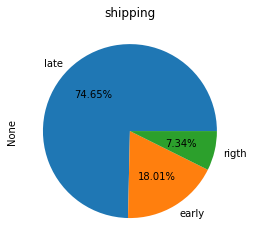

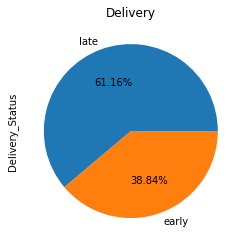

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2020,1,3,4,2003.0,1955,2225,WN,335,150,8.0,IAD,TPA,810,0.0
1,2020,1,3,4,754.0,735,1000,WN,3231,145,19.0,IAD,TPA,810,1.0
2,2020,1,3,4,628.0,620,750,WN,448,90,8.0,IND,BWI,515,0.0
3,2020,1,3,4,926.0,930,1100,WN,1746,90,-4.0,IND,BWI,515,0.0
4,2020,1,3,4,1829.0,1755,1925,WN,3920,90,34.0,IND,BWI,515,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8745,2020,1,6,7,1928.0,1920,2020,WN,2611,120,8.0,BWI,BNA,588,0.0
8746,2020,1,6,7,927.0,925,1030,WN,127,65,2.0,BWI,BUF,281,0.0
8747,2020,1,6,7,1147.0,1145,1250,WN,903,65,2.0,BWI,BUF,281,0.0
8748,2020,1,6,7,1705.0,1655,1805,WN,1516,70,10.0,BWI,BUF,281,0.0


In [ ]:

def data_NA_drop(data):
  data =data.dropna()
  data =data.reset_index(drop=True)
  return data

def trash_data(trash):
  global data
  data=data.drop([trash])

def Timedata_filter(timedata):
  timefilter =[]
  trash =0
  for i in timedata:
    i=str(int(i))
    if len(i)==3 or len(i)==4:
      timefilter.append(i)
      trash +=1
    else:
      trash_data(trash)
      trash +=1
  return timefilter

def time_separation(time_format):
  hours=[]
  minutes=[]
  for i in time_format:
    if len(i)==3 or len(i)==4:
      mi=i[:-2]
      ho=i[-2:]
      hours.append(int(ho))
      minutes.append(int(mi))
  return hours,minutes

def Shipping_expectation(ast,pst):
  time_sh={"S":[]}
  for x,y in zip(ast,pst): 
    if x==y:
      time_sh["S"].append("rigth")
    elif x<y:
      time_sh["S"].append("early")
    elif x>y:
      time_sh["S"].append("late")
  return time_sh

def Shipping_delay(ast,pst):
  time_de={"delay":[]}
  h1,m1=time_separation(ast)
  h2,m2=time_separation(pst)
  for x1,y1,x2,y2 in zip(h1,m1,h2,m2):
    h3=60*(x1-x2)
    time_de["delay"].append((h3+y1)-y2)
  return time_de
  
def Delivery_expectation(sdt):
  time_del={"D":[]}
  for x in sdt: 
    if x==0:
      time_del["D"].append("rigth")
    elif x<0:
      time_del["D"].append("early")
    elif x>0:
      time_del["D"].append("late")
  return time_del 

def Delivery_efficiency(data):
  data.value_counts().plot(kind="pie",labels=["late","early","rigth"],title="Delivery",autopct='%1.2f%%')
  return plt.show()

def Shipment_efficiency(A_Stime,P_Stime):
  shipping_expec=Shipping_expectation(A_Stime,P_Stime)
  shipping_expec=pd.DataFrame(shipping_expec)
  shipping_expec.value_counts().plot(kind="pie",labels=["late","early","rigth"],title="shipping",autopct='%1.2f%%')
  return plt.show()

data=data_NA_drop(data)
A_Stime=Timedata_filter(data["Actual_Shipment_Time"])
P_Stime=Timedata_filter(data["Planned_Shipment_Time"])
P_Dtime=Timedata_filter(data["Planned_Delivery_Time"])
S_Dtime=data["Shipment_Delay"]
P_Ttravel=data["Planned_TimeofTravel"]
D_Status=data["Delivery_Status"]

Shipment_efficiency(A_Stime,P_Stime)

Delivery_efficiency(D_Status)

plt.show()

data



  